In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

from statsmodels.sandbox.stats.runs import runstest_1samp
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.stattools import acf

import os
import re
from scipy import ndimage
import math
import random
import cv2
import skimage
from scipy import stats
import pylab

from PIL import Image, ImageEnhance
from skimage.measure import label, regionprops
from skimage.io import imsave
from skimage.filters import threshold_otsu

def img_info_to_part_id(imgname, location):
	imgid = int(re.search(r"img(\d+)\.bmp", imgname).group(1))
	if location == "top_left":
		return (imgid - 1) * 4
	elif location == "bottom_left":
		return (imgid - 1) * 4 + 1
	elif location == "top_right":
		return (imgid - 1) * 4 + 2
	elif location == "bottom_right":
		return (imgid - 1) * 4 + 3
	else:
		raise ValueError("Invalid location: {}".format(location))

# example
print(img_info_to_part_id("img01.bmp", "top_left"))
print(img_info_to_part_id("img01.bmp", "bottom_left"))
print(img_info_to_part_id("img01.bmp", "top_right"))
print(img_info_to_part_id("img01.bmp", "bottom_right"))
print()
print(img_info_to_part_id("img02.bmp", "top_left"))
print(img_info_to_part_id("img02.bmp", "bottom_left"))
print(img_info_to_part_id("img02.bmp", "top_right"))
print(img_info_to_part_id("img02.bmp", "bottom_right"))

def part_id_to_img_info(part_id):
	pid_copy = part_id
	while pid_copy % 4 != 0:
		pid_copy -= 1
	imgnum = pid_copy // 4 +1 
	imgnum = "{:02d}".format(imgnum)

	if part_id % 4 == 0:
		location = "top_left"
	elif part_id % 4 == 1:
		location = "bottom_left"
	elif part_id % 4 == 2:
		location = "top_right"
	elif part_id % 4 == 3:
		location = "bottom_right"
	else:
		raise ValueError("Invalid part ID: {}".format(part_id))

	return imgnum, location

# example
print(part_id_to_img_info(0))
print(part_id_to_img_info(1))
print(part_id_to_img_info(2))
print(part_id_to_img_info(3))
print()
print(part_id_to_img_info(4))
print(part_id_to_img_info(5))
print(part_id_to_img_info(6))
print(part_id_to_img_info(7))

cartella_immagini = {
	'originals': '../Processed dataset/df/',
	'rot&crop': '../Processed dataset/df new/',
	# Altre associazioni possibili
}

def genera_percorso_immagine(part_id, which_ones="originals",option="seg"):	
	imgnum, location = part_id_to_img_info(part_id)
	real_option = option
	if option=="seg":
		real_option = "segmented"
	else:
		real_option = "labeled"

	nome_immagine = f"img{imgnum}.bmp_{location}_{real_option}.png"
	return os.path.join(cartella_immagini[which_ones], nome_immagine)

# Utilizzo della funzione
print(genera_percorso_immagine(0, "originals"))
print(genera_percorso_immagine(1, "originals"))
print(genera_percorso_immagine(2, "originals"))
print(genera_percorso_immagine(3, "originals"))


def plot_object(part_id):
	plt.figure(figsize=(8, 10))

	plt.subplot(1, 2, 1)
	# plt.subplot(1, 2, 2)
	# plt.subplot(1, 4, 2)
	img_new = plt.imread(genera_percorso_immagine(part_id, "rot&crop","lab"))
	height, width = img_new.shape[:2]
	zoom_factor = 0.8 
	zoomed_width = width * zoom_factor
	zoomed_height = height * zoom_factor
	x_center = width // 2
	y_center = height // 2
	x1 = max(0, x_center - zoomed_width // 2)
	x2 = min(width, x_center + zoomed_width // 2)
	y1 = max(0, y_center - zoomed_height // 2)
	y2 = min(height, y_center + zoomed_height // 2)
	plt.imshow(img_new, cmap="gray")
	plt.axis('off')
	plt.xlim(x1, x2)
	plt.ylim(y2, y1)
	plt.title(f"img new (part_id {part_id}, nvoids={df_new_parts.iloc[part_id]['Num_voids']})")

	plt.subplot(1, 2, 2)
	# plt.subplot(1, 4, 4)
	img_new = plt.imread(genera_percorso_immagine(part_id, "rot&crop","seg"))
	print(img_new.shape[0],"rows -",img_new.shape[1],"cols")

	plt.imshow(img_new,cmap="gray")
	plt.title(f"img new (part_id {part_id}, nvoids={df_new_parts.iloc[part_id]['Num_voids']})")
	plt.axis("off")

	plt.tight_layout()
	plt.show()

0
1
2
3

4
5
6
7
('01', 'top_left')
('01', 'bottom_left')
('01', 'top_right')
('01', 'bottom_right')

('02', 'top_left')
('02', 'bottom_left')
('02', 'top_right')
('02', 'bottom_right')
../Processed dataset/df/img01.bmp_top_left_segmented.png
../Processed dataset/df/img01.bmp_bottom_left_segmented.png
../Processed dataset/df/img01.bmp_top_right_segmented.png
../Processed dataset/df/img01.bmp_bottom_right_segmented.png


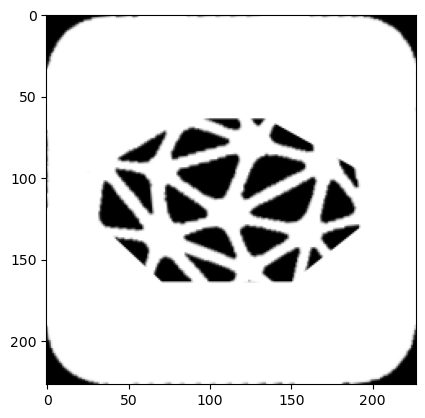

In [8]:
img = cv2.imread("../Processed dataset/eccentricity_test.png")
plt.imshow(img)

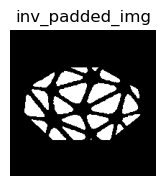

<Figure size 800x800 with 0 Axes>

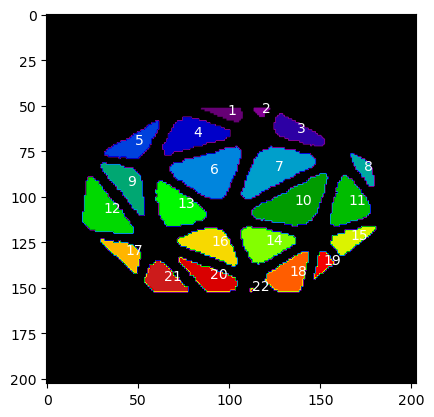

Nvoids from props: 22


In [69]:
# image = Image.open(os.path.join(output_folder, filename))
image = Image.open("../Processed dataset/eccentricity_test.png")
statistics = []

# Convert the image to grayscale
image = image.convert('L')
# # Increase the contrast
enhancer = ImageEnhance.Contrast(image)
image = enhancer.enhance(100)
# width, height = image.size
# image = image.crop((0,0,width,height))
image = np.array(image)
# plt.imshow(image, cmap='gray')
# plt.axis('off')  # Nasconde gli assi
# plt.show()
otsu_thresh = threshold_otsu(image)
image = image > otsu_thresh

# Convert the boolean image to an 8-bit unsigned integer image
# img = (threshInv.astype(np.uint8) * 255)
img = (image.astype(np.uint8) * 255)
# Use regionprops to get properties of the region
part_props = regionprops(img)[0]  # Get the first (and only) region
# Crop the image with margin around the bounding box
minr, minc, maxr, maxc = part_props.bbox
# print(part_props.bbox)
minr_crop = max(minr + 12, 0)
minc_crop = max(minc + 12, 0)
maxr_crop = min(maxr - 12, img.shape[0])
maxc_crop = min(maxc - 12, img.shape[1])
padded_img = img[minr_crop:maxr_crop, minc_crop:maxc_crop]

# Invert the padded image
inv_padded_img = 255 - padded_img
plt.subplot(1,3,2)
plt.imshow(inv_padded_img,cmap="gray")
plt.axis('off')
plt.title("inv_padded_img")

# Apply labeling
labels = label(inv_padded_img, background=0)
# props_voids = regionprops(labels)
# Find the biggest region
# biggest_region = max(props_voids, key=lambda region: region.area)
# Set the pixels in the biggest region to 0
# labels[labels == biggest_region.label] = 0
# Repeat labeling
# labels = label(labels, background=0)
props_voids = regionprops(labels)
# Create a figure and axes
plt.figure(figsize=(8, 8))
fig, ax = plt.subplots()
# Display the image
ax.imshow(labels, cmap='nipy_spectral')
# Annotate label numbers

for region in regionprops(labels):
	# Get the coordinates of the centroid
	y, x = region.centroid
	# Annotate the label number at the centroid
	ax.text(x, y, str(region.label), color='white')
# Save the labeled image  		
labeled_filename = f"img eccentricity test.png"
# labeled_output_path = os.path.join(output_folder, labeled_filename)
# plt.savefig(labeled_output_path)
# Close the figure to free up memory
plt.show()


# For each statistic in regionprops, create a row with Image name, Position, Region type, ID, and each metric
statistics.append({
	"Image name": f"img eccentricity test.png",
	"Position": "None",
	"Region type": "part",
	"ID": 0,
	"Area [pixels]": round(part_props.area, 3),
	"Perimeter [pixels]": round(part_props.perimeter, 3),
	"Eccentricity": round(part_props.eccentricity, 3),
	"Orientation [radians]": round(part_props.orientation, 3),
	"Solidity": round(part_props.solidity, 3),
	"Extent": round(part_props.extent, 3),
	"Major Axis Length [pixels]": round(part_props.major_axis_length, 3),
	"Minor Axis Length [pixels]": round(part_props.minor_axis_length, 3),
	"Equivalent Diameter [pixels]": round(part_props.equivalent_diameter, 3),
	"Part_ID": -1,
	"Num_voids": len(props_voids)
})

old_size = len(statistics)
# print(f"Old size: {len(statistics)}")

# Loop over each void
#### IGNORE VOIDS HERE IN THIS TEST
# for i, prop in enumerate(props_voids, start=1):
# 	# For each statistic in regionprops, create a row with Image name, Position, Region type, ID, and each metric
# 	statistics.append({
# 		"Image name": f"img eccentricity test.png",
# 		"Position": "None",
# 		"Region type": "void",
# 		"ID": i,
# 		"Area [pixels]": round(prop.area, 3),
# 		"Perimeter [pixels]": round(prop.perimeter, 3),
# 		"Eccentricity": round(prop.eccentricity, 3),
# 		"Orientation [radians]": round(prop.orientation, 3),
# 		"Solidity": round(prop.solidity, 3),
# 		"Extent": round(prop.extent, 3),
# 		"Major Axis Length [pixels]": round(prop.major_axis_length, 3),
# 		"Minor Axis Length [pixels]": round(prop.minor_axis_length, 3),
# 		"Equivalent Diameter [pixels]": round(prop.equivalent_diameter, 3),
# 		"Part_ID": -1,
# 		"Num_voids": len(props_voids)
# 	})

print(f"Nvoids from props: {len(props_voids)}")
# print(f"Rows added now: {len(statistics)-old_size}")
# print(f"Nvoids in df old were: {df_parts.iloc[part_id]['Num_voids']}\n")

In [70]:
statistics
statistics_df = pd.DataFrame(statistics)
statistics_df.head()

,Image name,Position,Region type,ID,Area [pixels],Perimeter [pixels],Eccentricity,Orientation [radians],Solidity,Extent,Major Axis Length [pixels],Minor Axis Length [pixels],Equivalent Diameter [pixels],Part_ID,Num_voids
0,img eccentricity test.png,None,part,0,42849,2620.4,0.175,-0.187,0.854,0.832,272.454,268.238,233.574,-1,22


In [60]:
# Loading a CSV file into a DataFrame
df_void = pd.read_csv('../Processed dataset/df_voids.csv')
df_parts = pd.read_csv('../Processed dataset/df_parts.csv')
df_void_new = pd.read_csv('../Processed dataset/df_new_voids.csv')
df_parts_new = pd.read_csv('../Processed dataset/df_new_parts.csv')
df_new_parts = pd.read_csv('../Processed dataset/df_new_parts.csv')

#df_parts.head(10)
df_parts_new.head(10)

,Image name,Position,Region type,ID,Area [pixels],Perimeter [pixels],Eccentricity,Orientation [radians],Solidity,Extent,Major Axis Length [pixels],Minor Axis Length [pixels],Equivalent Diameter [pixels],Part_ID,Num_voids,Num_Wpixels,Num_Bpixels,Wpixels_ratio,Curvature Mean
0,img01.bmp,top_left,part,0,38291,4105.674,0.153,-1.268,0.760,0.743,277.925,274.667,220.802,0,41,38291,13692,0.736606,0.006382
1,img01.bmp,bottom_left,part,0,37887,4155.306,0.157,-1.304,0.752,0.735,279.026,275.584,219.634,1,42,37887,14096,0.728834,0.006624
2,img01.bmp,top_right,part,0,37334,4106.076,0.189,1.564,0.752,0.734,277.777,272.791,218.026,2,46,37334,14194,0.724538,0.006660
3,img01.bmp,bottom_right,part,0,37868,4139.319,0.164,-1.070,0.756,0.738,277.900,274.158,219.579,3,45,37868,13661,0.734887,0.005039
4,img02.bmp,top_left,part,0,36599,4223.005,0.118,-0.817,0.730,0.713,280.140,278.182,215.869,4,41,36599,15385,0.704044,0.006398
5,img02.bmp,bottom_left,part,0,36382,4305.088,0.104,-0.787,0.722,0.706,280.715,279.187,215.228,5,42,36382,15602,0.699869,0.006654
6,img02.bmp,top_right,part,0,36808,4366.544,0.067,-1.190,0.737,0.721,278.233,277.617,216.484,6,47,36808,14721,0.714316,0.005715
7,img02.bmp,bottom_right,part,0,36903,4180.034,0.127,-0.903,0.738,0.723,279.169,276.892,216.763,7,43,36903,15081,0.709892,0.005634
8,img03.bmp,top_left,part,0,37697,4124.720,0.123,-1.276,0.753,0.735,277.368,275.259,219.083,8,43,37697,14059,0.728360,0.005471
9,img03.bmp,bottom_left,part,0,37626,4153.833,0.117,-0.853,0.751,0.733,277.820,275.897,218.876,9,43,37626,14130,0.726988,0.006325


Text(0.5, 0.98, 'Eccentricity understanding test')

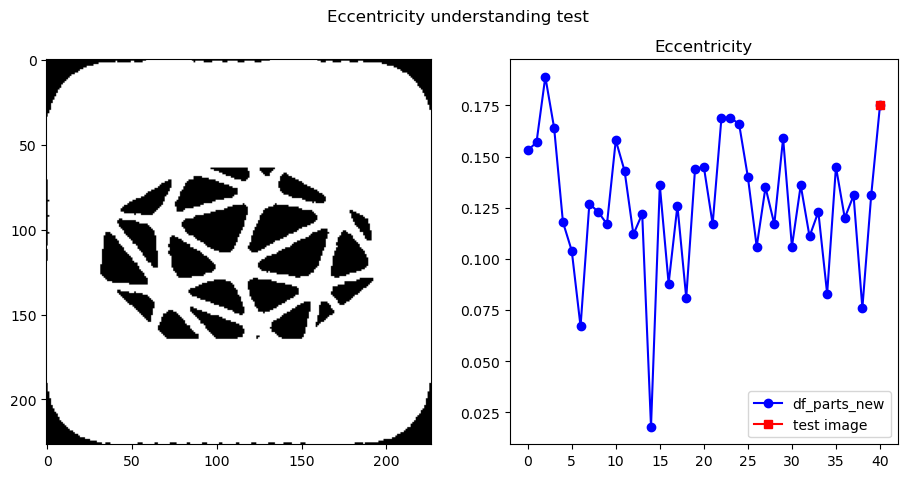

In [91]:
plt.figure(figsize=(11,5))
plt.subplot(1, 2, 1)
plt.imshow(img,cmap="gray")

variable_to_test = "Eccentricity"
data = {variable_to_test: df_parts_new[variable_to_test].tolist()}
df = pd.DataFrame(data)
nuovo_valore = statistics_df[variable_to_test]
df = df.append({variable_to_test: nuovo_valore}, ignore_index=True)

plt.subplot(1, 2, 2)
plt.plot(df.index, df[variable_to_test], marker='o', linestyle='-', color='blue', label='df_parts_new')
plt.plot(df.index[-1], df[variable_to_test].iloc[-1], marker='s', color='red', label='test image')
plt.title(variable_to_test)
plt.legend()

# Aggiunta del titolo generale al subplot
plt.suptitle('Eccentricity understanding test')
# plt.tight_layout()


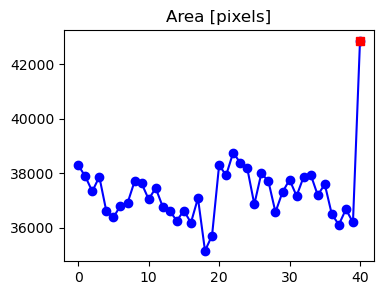

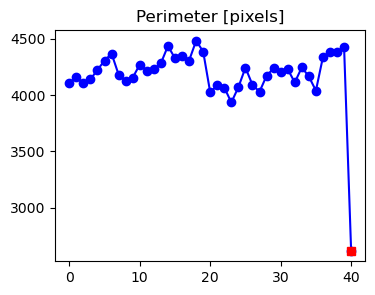

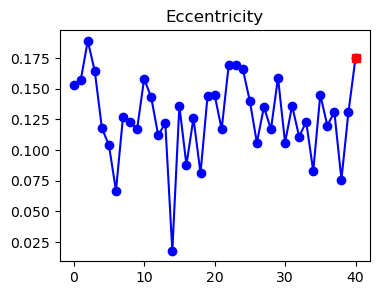

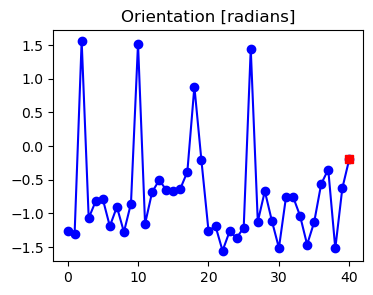

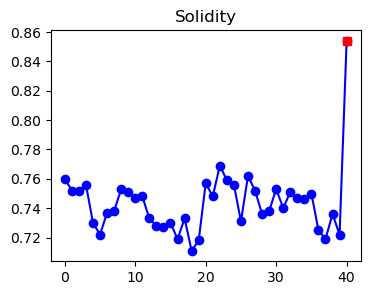

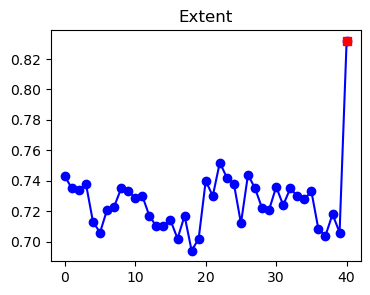

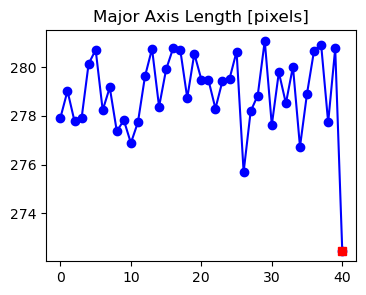

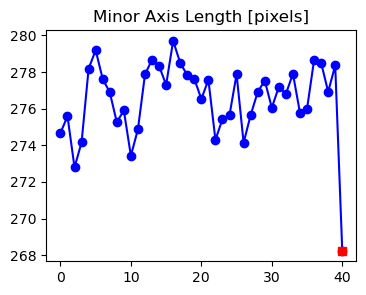

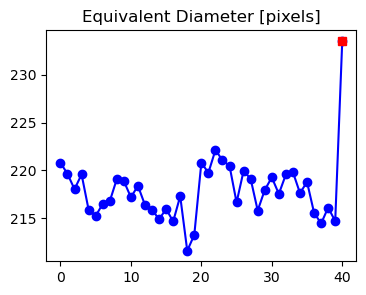

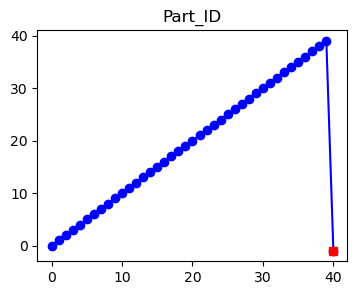

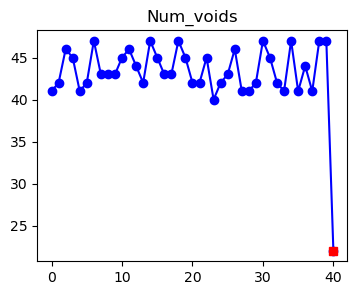

KeyError: 'Num_Wpixels'

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

variable_to_test = "Minor Axis Length [pixels]"
variable_to_test = "Major Axis Length [pixels]"
variable_to_test = "Eccentricity"

for variable_to_test in df_new_parts.columns[4:]:
	# DataFrame di esempio
	data = {variable_to_test: df_parts_new[variable_to_test].tolist()}
	df = pd.DataFrame(data)

	nuovo_valore = statistics_df[variable_to_test]

	# Aggiungi il nuovo valore alla colonna del DataFrame
	df = df.append({variable_to_test: nuovo_valore}, ignore_index=True)
	df
	# Plot
	# plt.plot(df[variable_to_test], marker='o', linestyle='-')
	# plt.title('Plot dei valori con il nuovo valore aggiunto')
	# plt.show()

	plt.figure(figsize=(4,3))
	plt.plot(df.index, df[variable_to_test], marker='o', linestyle='-', color='blue', label='Valori precedenti')
	plt.plot(df.index[-1], df[variable_to_test].iloc[-1], marker='s', color='red', label='Ultimo valore')
	plt.title(variable_to_test)
	plt.show()

228 rows - 227 cols


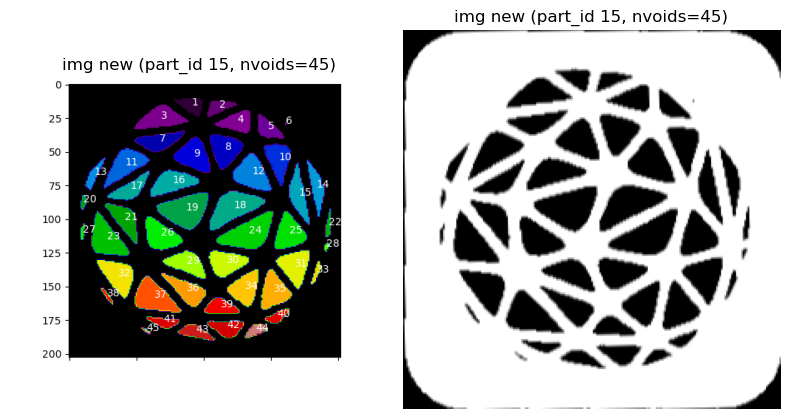

In [62]:
plot_object(15)

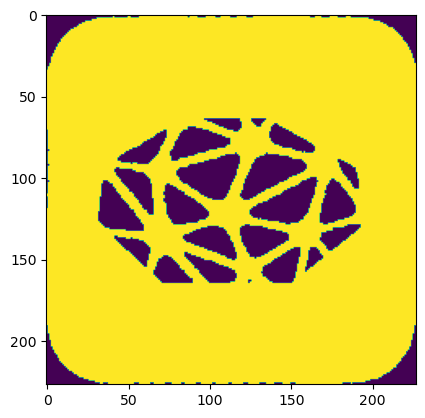

In [55]:
plt.imshow(img)

In [14]:
plt.plot([df_parts_new["Eccentricity"],statistics["Eccentricity"]])

TypeError: list indices must be integers or slices, not str